In [1]:
# 📦 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pd.set_option("display.max_columns", None)

In [2]:
# 📁 2. Load Multiple CSVs
data_path = r"C:\Users\Abdulsamad\Documents\Upload_Intelligence\sample_project_1\IDS\CICIDS 2017"
csv_files = glob(f"{data_path}/*pcap_ISCX.csv")[:4]  # Load 4 files for demo
df = pd.concat([pd.read_csv(f, low_memory=False) for f in csv_files], ignore_index=True)
print("Loaded rows:", len(df))

Loaded rows: 1233163


In [3]:
# 🧼 3. Clean Dataset (retain full labels)
df.columns = df.columns.str.strip()
if "Fwd Header Length.1" in df.columns:
    df.drop(columns=["Fwd Header Length.1"], inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df['Label'] = df['Label'].astype(str).str.strip()
df['Label'].value_counts()

Label
BENIGN      943414
PortScan    158804
DDoS        128025
Bot           1956
Name: count, dtype: int64

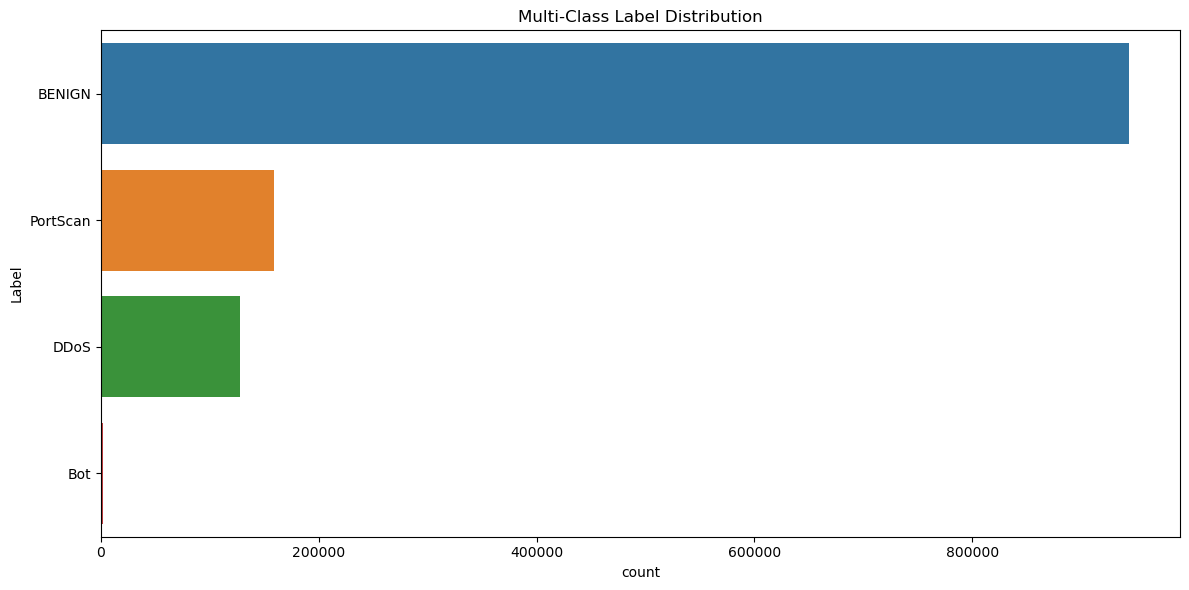

In [4]:
# 📊 4. Class Balance
plt.figure(figsize=(12,6))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
plt.title("Multi-Class Label Distribution")
plt.tight_layout()
plt.show()

In [5]:
# 🔢 5. Encode & Scale
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Multi-class: 0,1,...n classes

X = df.drop(columns=['Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 🧠 6. Train/Test + Train Model
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", np.mean(y_pred == y_test))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9980400908943353
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    188683
         Bot       0.45      0.92      0.60       391
        DDoS       1.00      1.00      1.00     25605
    PortScan       1.00      1.00      1.00     31761

    accuracy                           1.00    246440
   macro avg       0.86      0.98      0.90    246440
weighted avg       1.00      1.00      1.00    246440



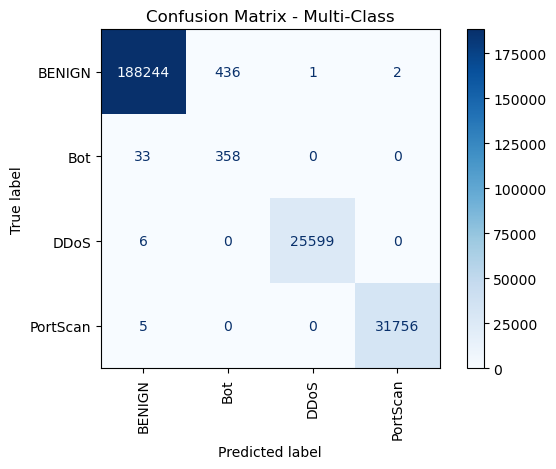

In [7]:
# 📊 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(
    cmap="Blues", xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - Multi-Class")
plt.tight_layout()
plt.show()

In [8]:
# 💾 8. Save Model
import joblib
joblib.dump(clf, "rf_multiclass_model.pkl")
joblib.dump(scaler, "scaler_multiclass.pkl")
joblib.dump(le, "label_encoder_multiclass.pkl")

['label_encoder_multiclass.pkl']